In [254]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [36]:
def load_dataset(path: str):
    df = pd.read_csv(path, index_col=[0])
    df.drop(columns=[
        "series_nodes_weighted_by_depth",
        "parallel_nodes_weighted_by_depth",
        "max_subgraph_size"
    ], inplace=True)
    return df

In [54]:
def plot_regression(X, Y):
    # Dodanie stałej (kolumny jedynek) do macierzy X
    x = sm.add_constant(X)
    
    # Budowa modelu
    model = sm.OLS(Y, x).fit()
    
    # Podsumowanie wyników
    # print(model.summary())
    
    # Wizualizacja
    plt.scatter(X, Y, label='Data')
    plt.plot(X, model.predict(x), color='red', label='Regression line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Epigenomics

In [37]:
epigenomics_df = load_dataset(os.path.join("tree_influence", "epigenomics.csv"))

In [38]:
epigenomics_corr = epigenomics_df.corr()

<Axes: >

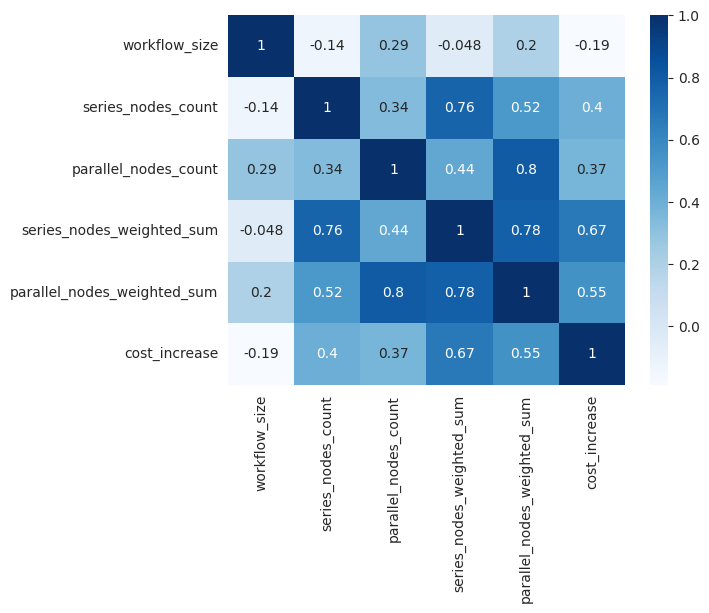

In [39]:
sns.heatmap(epigenomics_corr, cmap="Blues", annot=True)

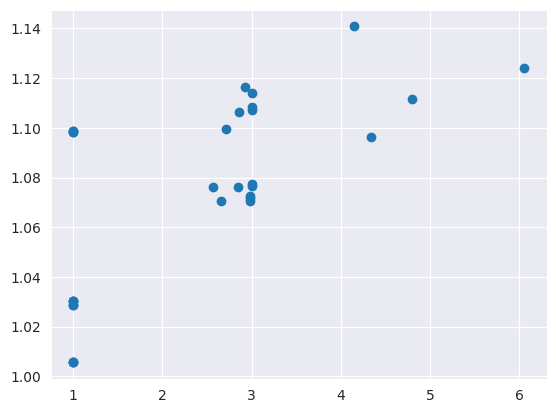

In [22]:
plt.scatter(epigenomics_df["series_nodes_weighted_sum"], epigenomics_df["cost_increase"])

In [59]:
epigenomics_corr["cost_increase"]

workflow_size                 -0.187874
series_nodes_count             0.403959
parallel_nodes_count           0.369229
series_nodes_weighted_sum      0.668737
parallel_nodes_weighted_sum    0.552480
cost_increase                  1.000000
Name: cost_increase, dtype: float64

# Epigenomics grouped by size 

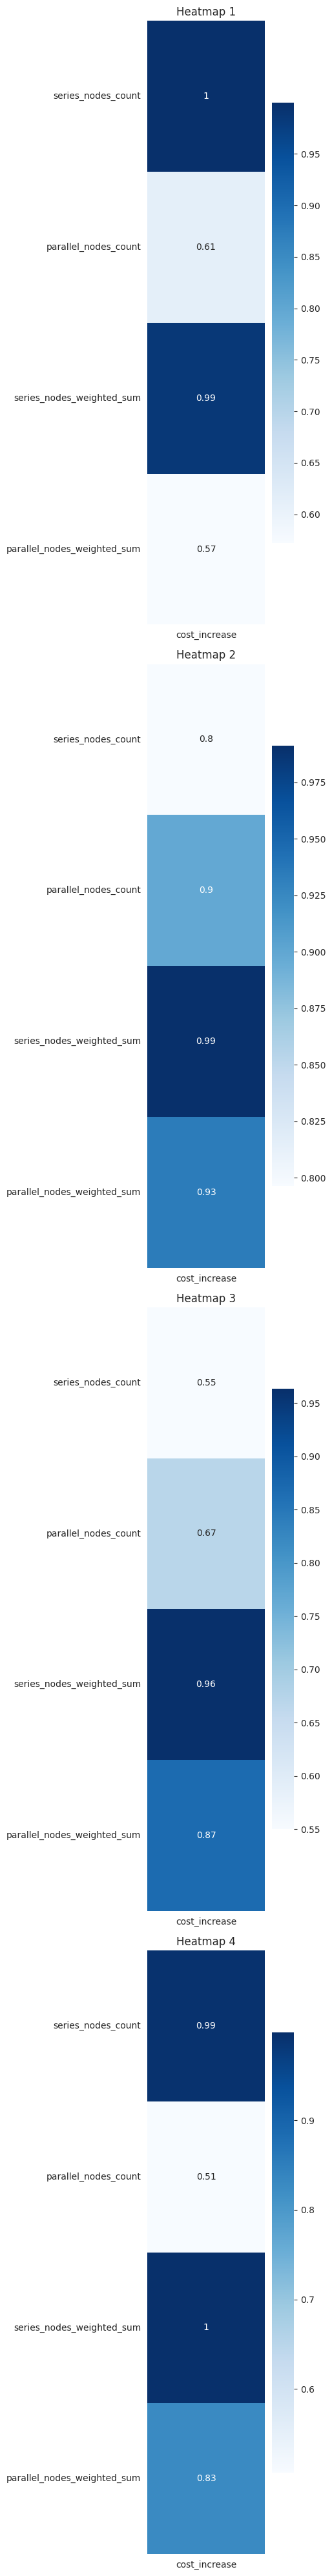

In [81]:
plt.figure(figsize=(5, 40))

for i, (size, dataframe) in enumerate(epigenomics_df.groupby("workflow_size")):
    plt.subplot(4, 1, i + 1)
    corr = dataframe.corr()
    # corr_filtered = corr[["series_nodes_count", "parallel_nodes_count", "series_nodes_weighted_sum", "parallel_nodes_weighted_sum"]]
    # sns.heatmap(corr_filtered.loc[["cost_increase"]], cmap="Blues", annot=True)
    corr_filtered = corr[["cost_increase"]]
    corr_selected_rows = corr_filtered.loc[["series_nodes_count", "parallel_nodes_count", "series_nodes_weighted_sum", "parallel_nodes_weighted_sum"]]
    corr_selected_rows.to_csv(os.path.join("tree_influence", "correlation", f"epigenomics_{size}.csv"), index=True)
    sns.heatmap(corr_selected_rows, cmap="Blues", annot=True)
    plt.title(f'Heatmap {i + 1}')

plt.tight_layout()
plt.show()

In [184]:
def save_heatmap(correlation, save_path):
    plt.figure(figsize=(2,6))
    sns.set(font_scale=1)
    sns.heatmap(correlation, cmap="Blues", annot=True, vmin=0.45)
    # plt.tight_layout()
    # plt.show()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

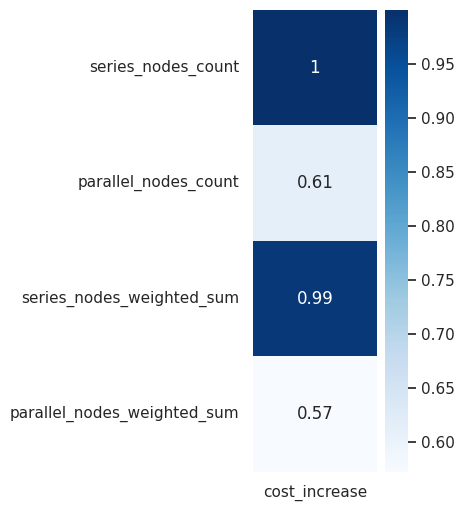

In [182]:
save_heatmap(
    pd.read_csv(os.path.join("tree_influence", "correlation", "epigenomics_41.csv"), index_col=0), 
    os.path.join("tree_influence", "correlation", "epigenomics_41.png"))

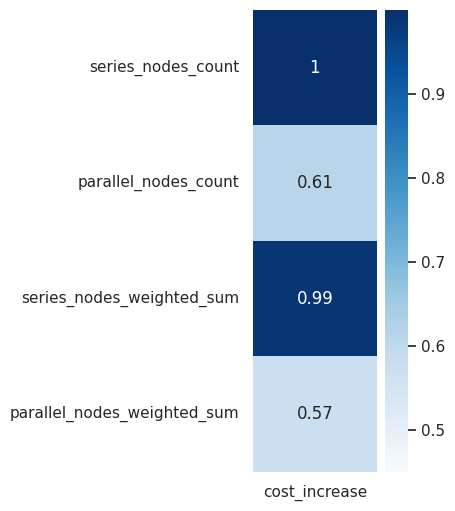

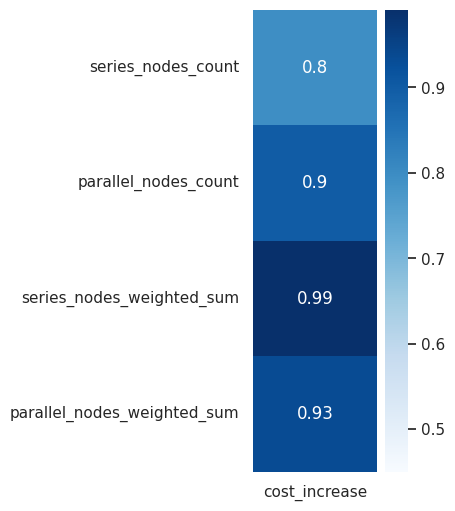

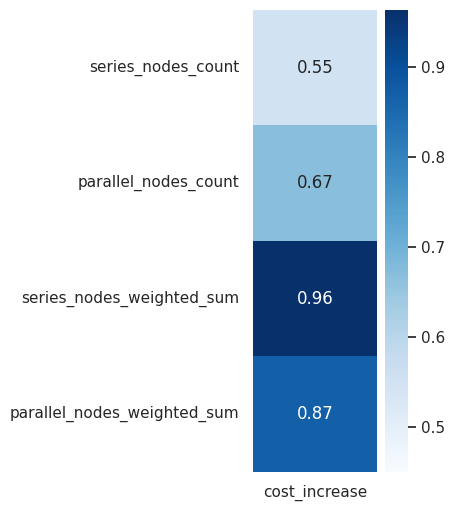

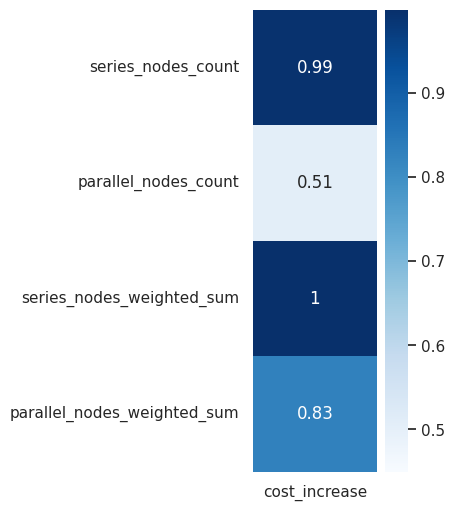

In [185]:
epigenomics_files = [
    "epigenomics_41",
    "epigenomics_233",
    "epigenomics_507",
    "epigenomics_983"
]

for f in epigenomics_files:
    save_heatmap(
    pd.read_csv(os.path.join("tree_influence", "correlation", f"{f}.csv"), index_col=0), 
    os.path.join("tree_influence", "correlation", f"{f}.png"))

In [196]:
merged_epigenomics_df = pd.DataFrame({
    41: pd.read_csv(os.path.join("tree_influence", "correlation", "epigenomics_41.csv"), index_col=0).T.loc["cost_increase"],
    233: pd.read_csv(os.path.join("tree_influence", "correlation", "epigenomics_233.csv"), index_col=0).T.loc["cost_increase"],
    507: pd.read_csv(os.path.join("tree_influence", "correlation", "epigenomics_507.csv"), index_col=0).T.loc["cost_increase"],
    983: pd.read_csv(os.path.join("tree_influence", "correlation", "epigenomics_983.csv"), index_col=0).T.loc["cost_increase"]
})

In [198]:
epigenomics_dfs = [
    pd.read_csv(os.path.join("tree_influence", "correlation", "epigenomics_41.csv"), index_col=0).T,
    pd.read_csv(os.path.join("tree_influence", "correlation", "epigenomics_233.csv"), index_col=0).T,
    pd.read_csv(os.path.join("tree_influence", "correlation", "epigenomics_507.csv"), index_col=0).T,
    pd.read_csv(os.path.join("tree_influence", "correlation", "epigenomics_983.csv"), index_col=0).T 
]

In [219]:
merged_df = pd.concat([*epigenomics_dfs], ignore_index=True)

In [220]:
merged_df["workflow_size"] = [41, 233, 507, 983]

In [221]:
merged_df.set_index("workflow_size", inplace=True)

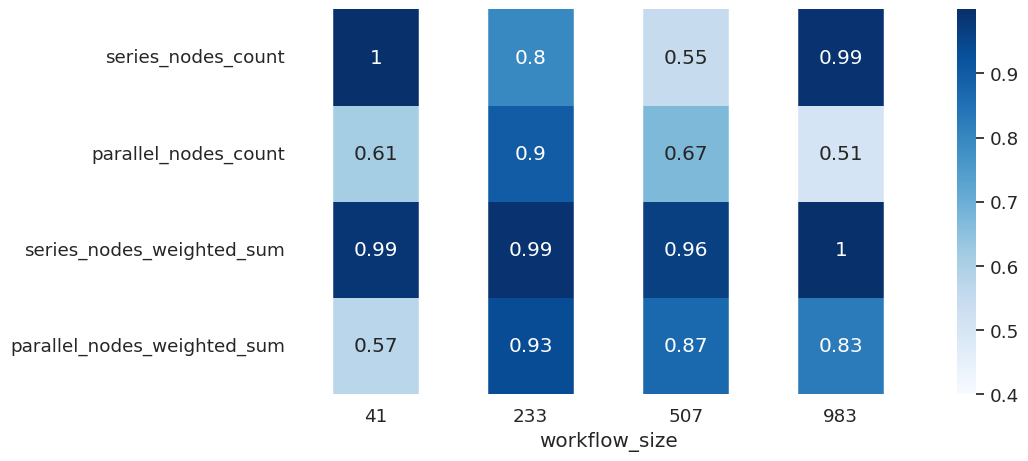

In [228]:
plt.figure(figsize=(10, 5))
ax = sns.heatmap(merged_df.T, vmin=0.4, cmap="Blues", annot=True)
sns.set(font_scale=1.2)
for i in range(merged_df.T.shape[1]+1):
    ax.axvline(i, color='white', lw=50)
plt.savefig(os.path.join("tree_influence", "correlation", "collected.png"), dpi=300, bbox_inches='tight')

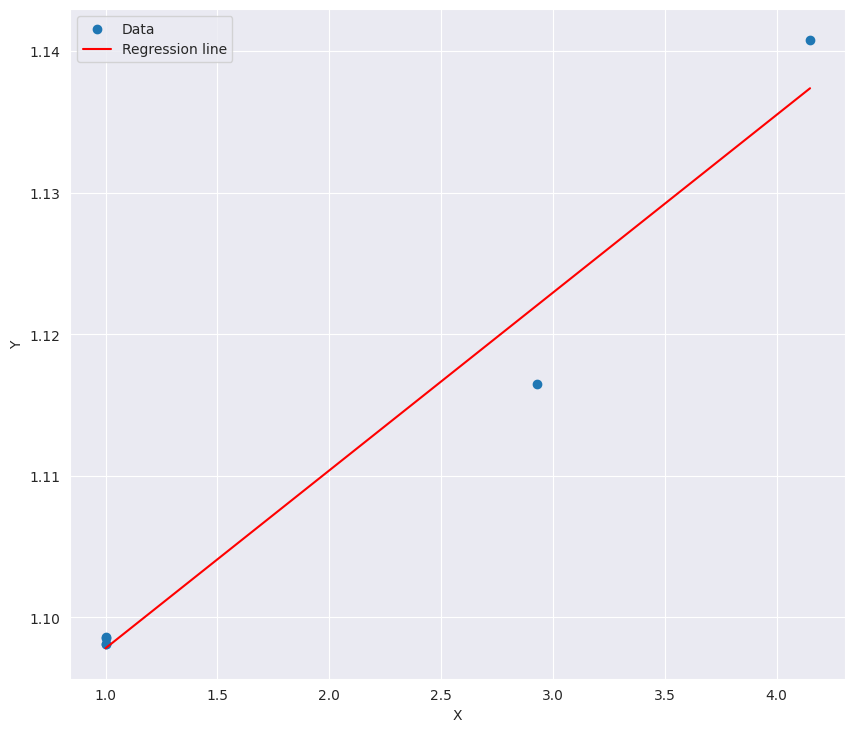

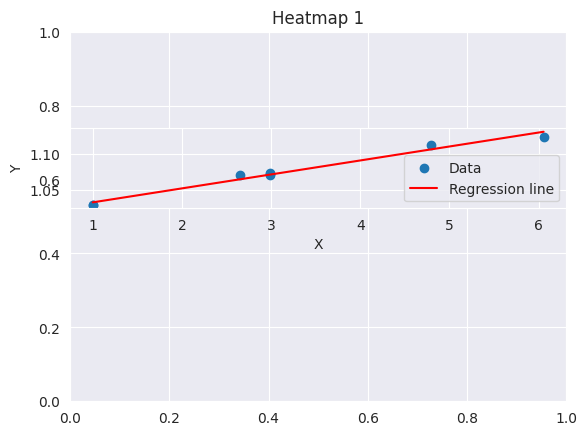

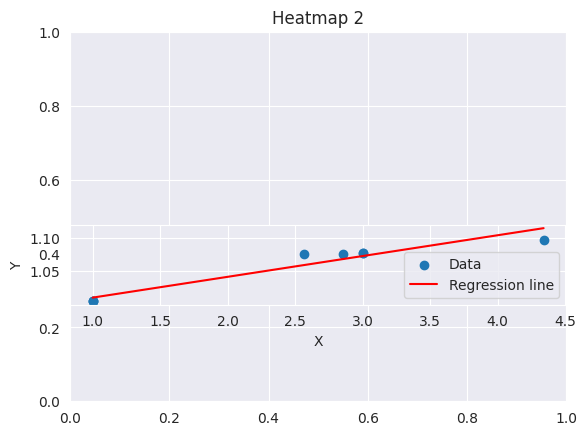

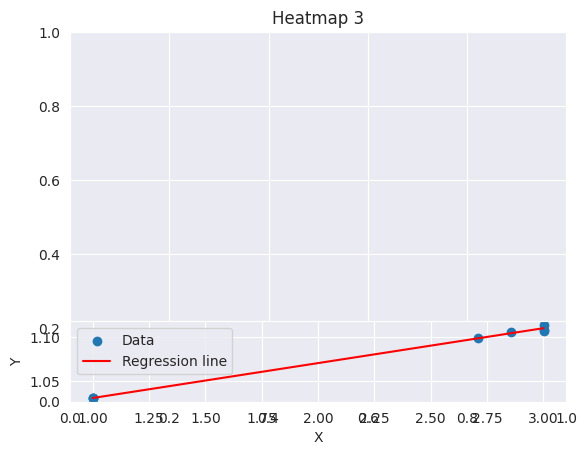

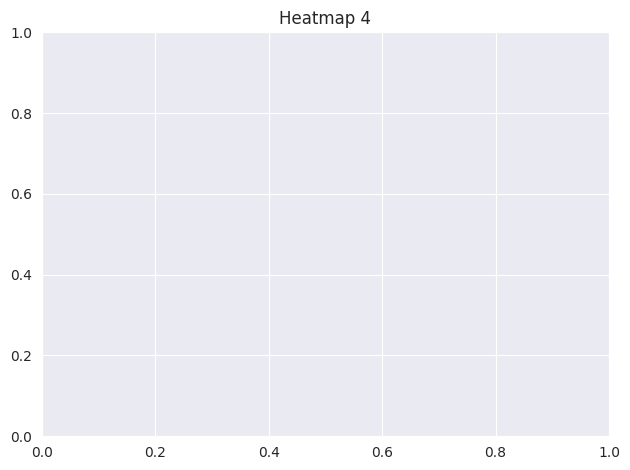

In [58]:
plt.figure(figsize=(10, 40))

for i, (size, dataframe) in enumerate(epigenomics_df.groupby("workflow_size")):
    plt.subplot(4, 1, i + 1)
    plot_regression(dataframe["series_nodes_weighted_sum"], dataframe["cost_increase"])
    plt.title(f'Heatmap {i + 1}')

plt.tight_layout()
plt.show()

## Linear regression

In [232]:
model = LinearRegression()
model.fit(epigenomics_df[["series_nodes_weighted_sum"]], epigenomics_df[["cost_increase"]])

LinearRegression()

In [233]:
r_sq = model.score(epigenomics_df[["series_nodes_weighted_sum"]], epigenomics_df[["cost_increase"]])
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.4472093867359902


In [250]:
def linear_regression(X, Y, save_path = None):
    model = LinearRegression()
    model.fit(X, Y)
    r_sq = model.score(X, Y)
    print(f"coefficient of determination: {r_sq}")
    plt.scatter(X, Y, label='Data')
    plt.plot(X, model.predict(X), color='red', label='Linear regression')
    plt.xlabel('series_nodes_weighted_sum')
    plt.ylabel('cost increase [%]')
    plt.legend() 
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        
    plt.show() 

coefficient of determination: 0.44720938673599053


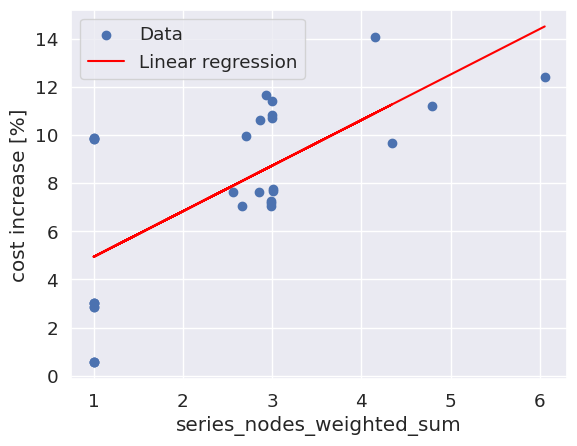

In [245]:
linear_regression(epigenomics_df[["series_nodes_weighted_sum"]], (epigenomics_df[["cost_increase"]] - 1) * 100)

coefficient of determination: 0.9706208899641222


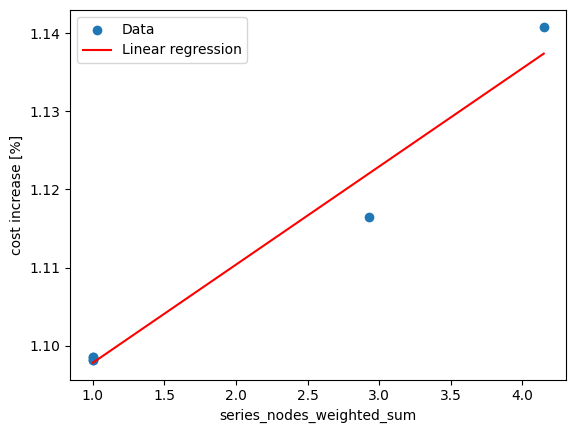

coefficient of determination: 0.9824903645699887


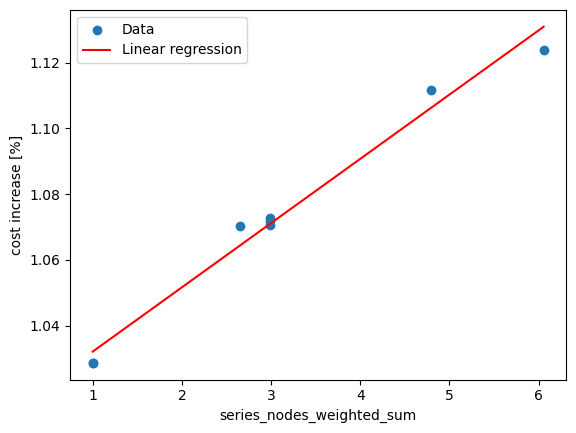

coefficient of determination: 0.9280025471111618


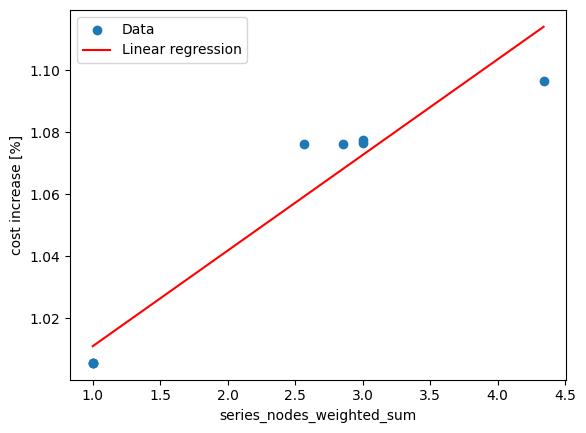

coefficient of determination: 0.9970707571642793


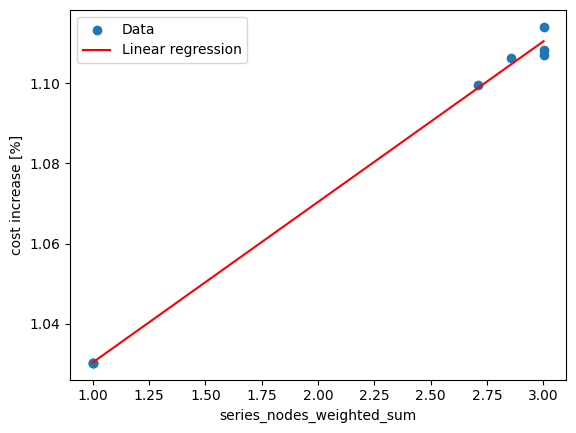

In [255]:
sns.reset_orig()
for i, (size, dataframe) in enumerate(epigenomics_df.groupby("workflow_size")):
    save_path = os.path.join("tree_influence", "correlation", f"linear_regression_epigenomics_{size}.png")
    linear_regression(dataframe[["series_nodes_weighted_sum"]], dataframe[["cost_increase"]], save_path)

# 1000Genome

In [41]:
genome_df = load_dataset(os.path.join("tree_influence", "1000Genome.csv"))

In [42]:
genome_corr = genome_df.corr()

<Axes: >

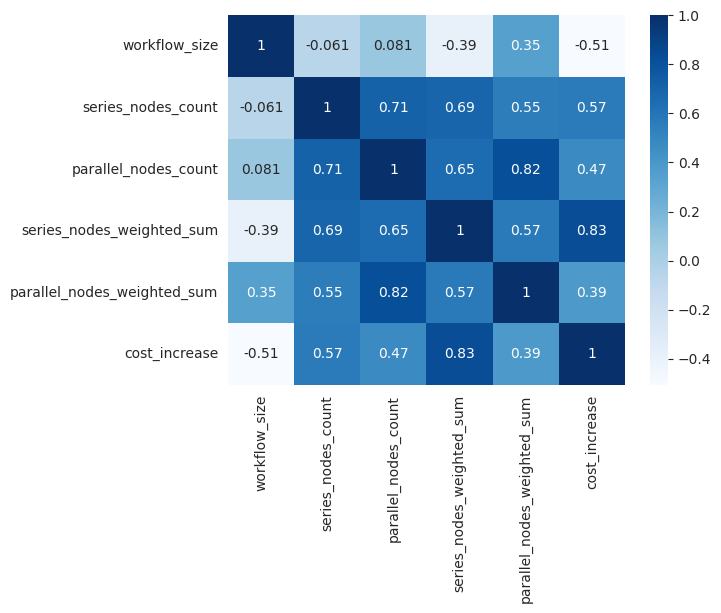

In [43]:
sns.heatmap(genome_corr, cmap="Blues", annot=True)

# 1000Genome grouped by size

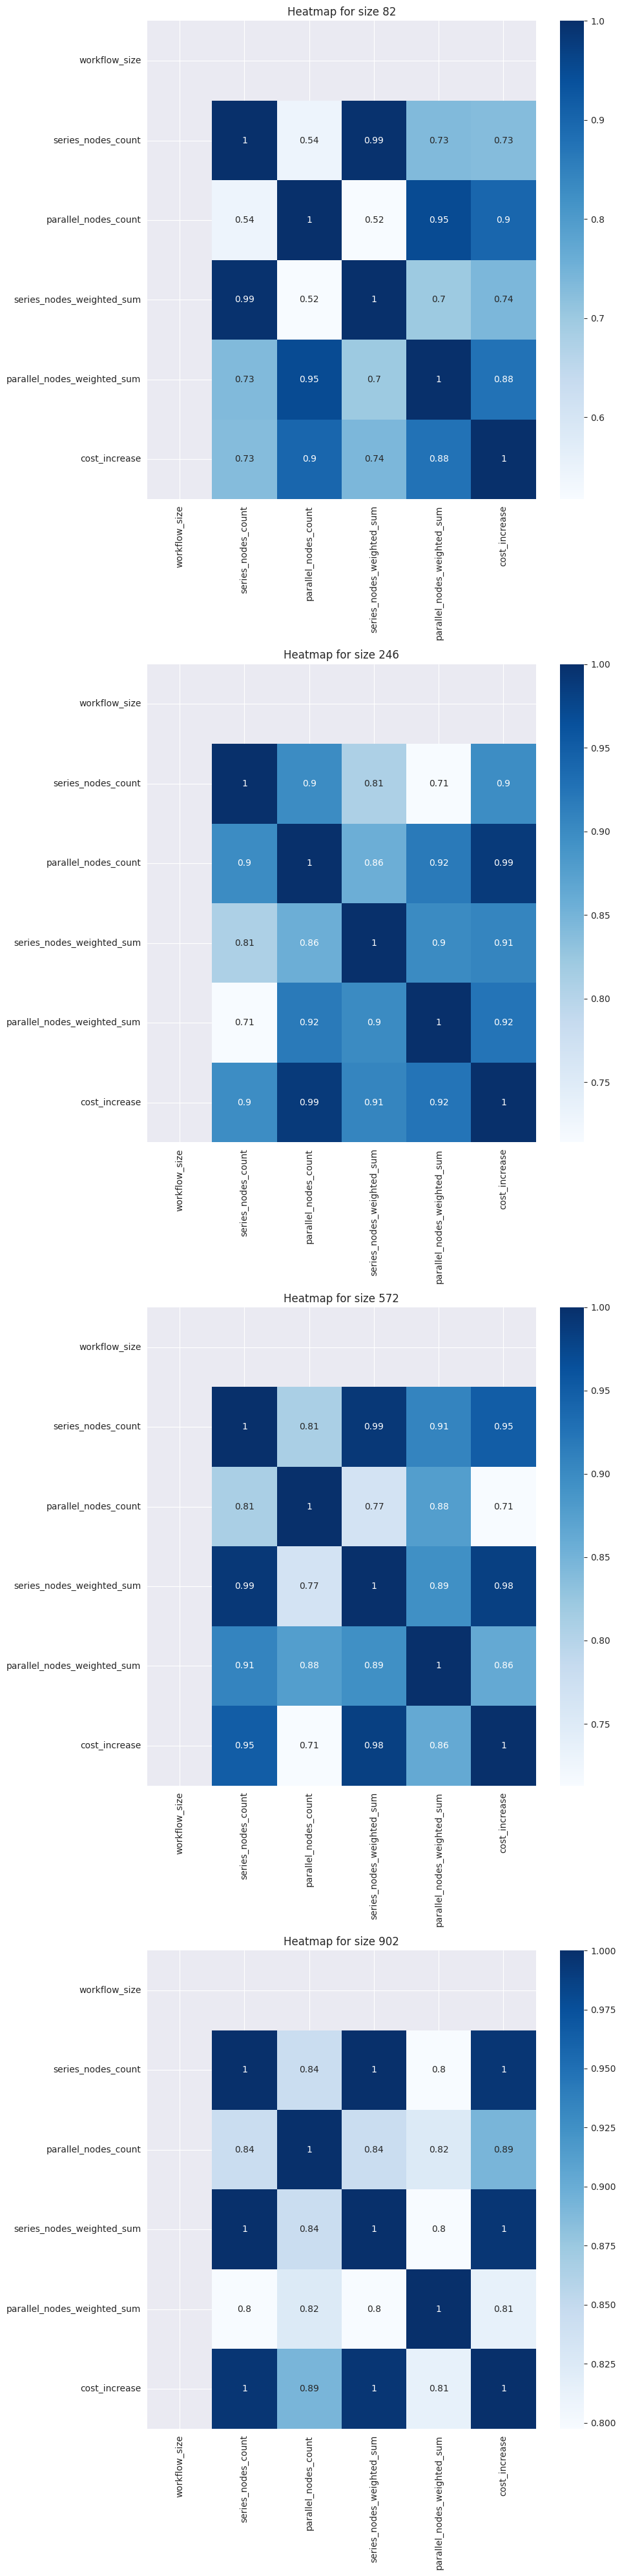

In [45]:
plt.figure(figsize=(10, 40))

for i, (size, dataframe) in enumerate(genome_df.groupby("workflow_size")):
    plt.subplot(4, 1, i + 1)
    corr = dataframe.corr()
    sns.heatmap(corr, cmap="Blues", annot=True)
    plt.title(f'Heatmap for size {size}')

plt.tight_layout()
plt.show()

coefficient of determination: 0.5465632493680526


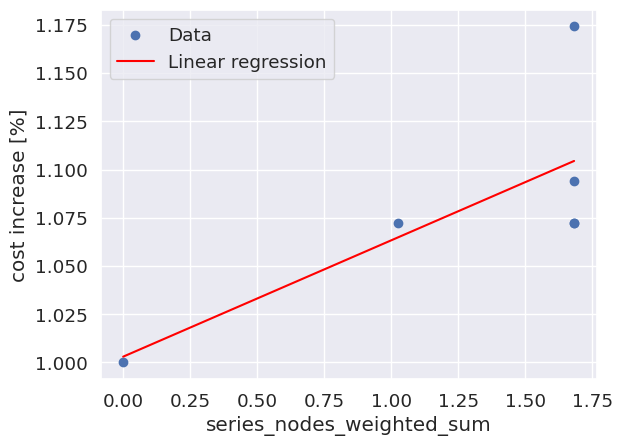

coefficient of determination: 0.8216626587943352


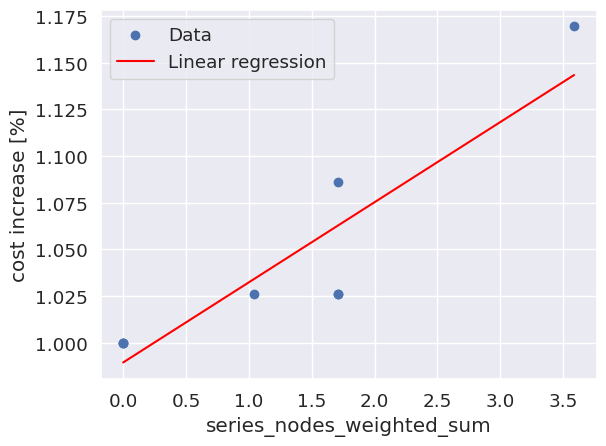

coefficient of determination: 0.9659263482996765


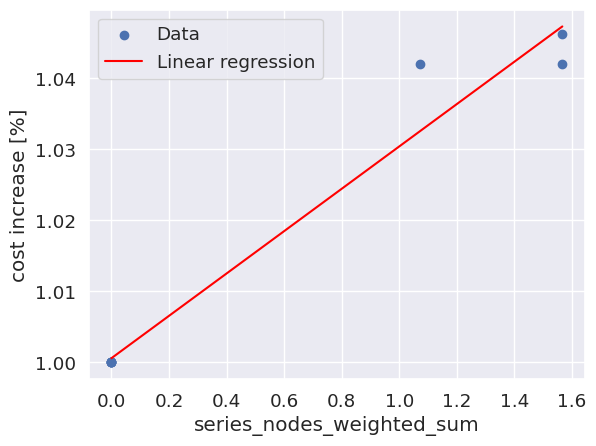

coefficient of determination: 0.9902669626605604


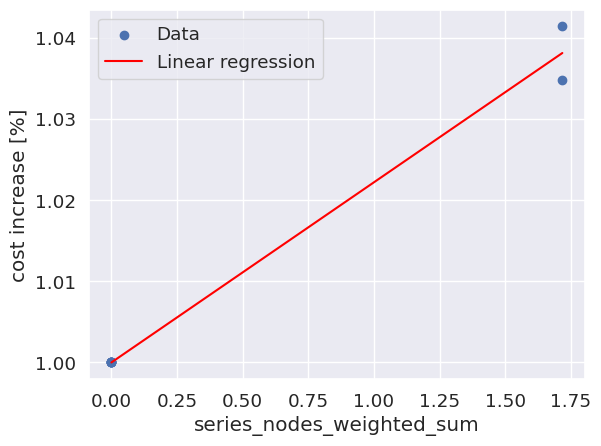

In [243]:
for i, (size, dataframe) in enumerate(genome_df.groupby("workflow_size")):
    linear_regression(dataframe[["series_nodes_weighted_sum"]], dataframe[["cost_increase"]])

# SRA Search

In [9]:
srasearch_df = load_dataset(os.path.join("tree_influence", "sra_search.csv"))

In [10]:
srasearch_corr = srasearch_df.corr()

<Axes: >

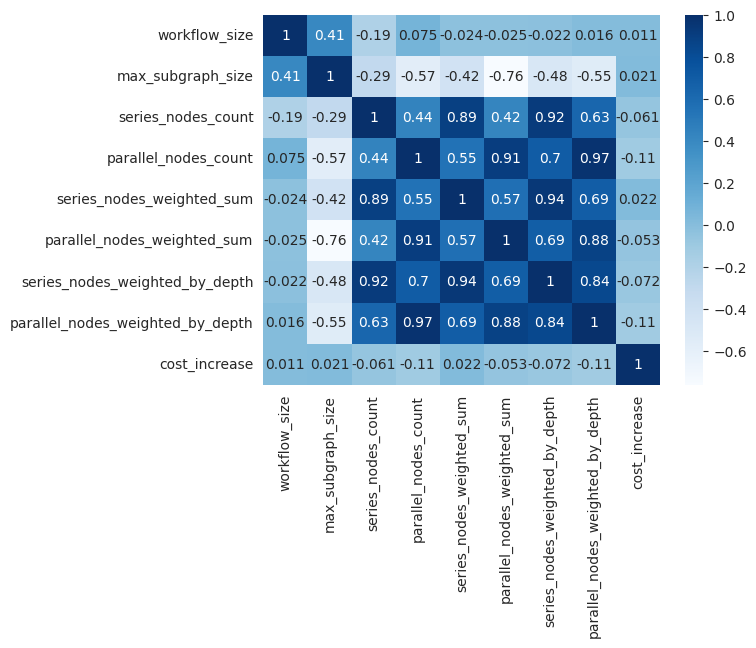

In [11]:
sns.heatmap(srasearch_corr, cmap="Blues", annot=True)

# Test for relative series nodes weight

In [12]:
epigenomics_df["series_nodes_weighted_sum_relative"] = epigenomics_df["series_nodes_weighted_sum"] / (epigenomics_df["series_nodes_weighted_sum"] + epigenomics_df["parallel_nodes_weighted_sum"])

In [13]:
epigenomics_modified_corr = epigenomics_df.corr()

<Axes: >

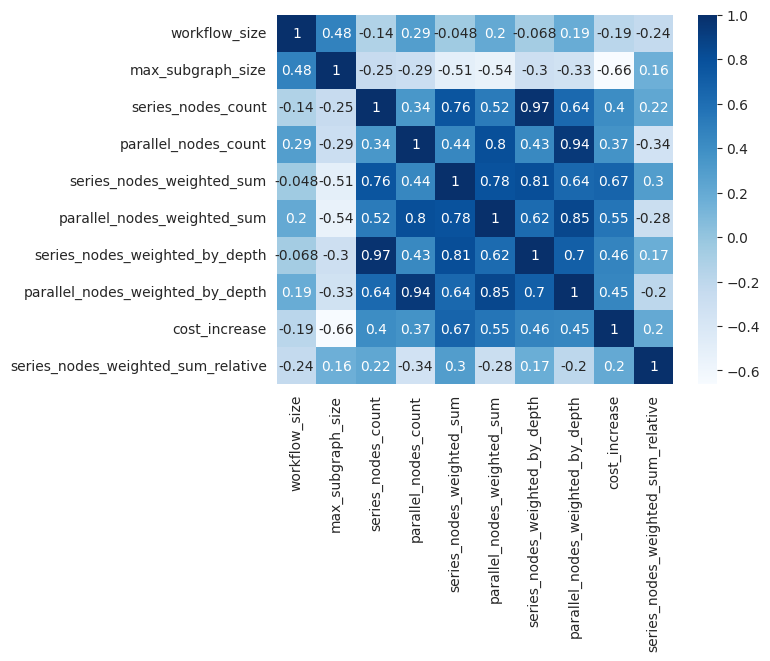

In [15]:
sns.heatmap(epigenomics_modified_corr, cmap="Blues", annot=True)